# Taller de Análisis de Texto con Tweets en Español

Este taller guía a los estudiantes en el análisis de tweets en español, usando técnicas de limpieza de texto, análisis de frecuencia de palabras y análisis de sentimientos. También incluye preguntas orientadas al negocio.

In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv

--2025-11-05 23:49:03--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv [following]
--2025-11-05 23:49:04--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205292 (200K) [text/plain]
Saving to: ‘Gender_bias_spanish.csv’

Gender_bias_s

## 1. Configuración e Importación de Librerías
Primero, importaremos las librerías necesarias y cargaremos el conjunto de datos.

In [3]:
!pip install nltk textblob wordcloud
import pandas as pd
import re
from nltk.corpus import stopwords
from textblob import TextBlob
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Cargar el Conjunto de Datos
Cargamos el archivo CSV que contiene los tweets y las etiquetas ('biased' o 'non-biased').

In [4]:
data = pd.read_csv('Gender_bias_spanish.csv')

In [5]:
data

,Contents,Label
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased
4,como siempre mi tortilla triunfa mas que otros...,non-biased
...,...,...
1909,"iba a ir a dash pero mis 3 cortadas, mi color ...",non-biased
1910,que pinche chiste tiene estar medio alto si to...,non-biased
1911,si fuera bien idiota. ya hubiera comprado un a...,non-biased
1912,nota mental: no le quieras ayudar a alguien qu...,non-biased


## 2. Exploración de Datos
Exploraremos el conjunto de datos para entender mejor la distribución de etiquetas y las características de los tweets.

In [15]:
# Resumen del conjunto de datos

# Contar la cantidad de tweets por etiqueta


In [32]:
data.head()

,Contents,Label
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased
4,como siempre mi tortilla triunfa mas que otros...,non-biased


In [27]:
data['Label'].value_counts(normalize=True)

,proportion
Label,
non-biased,0.833856
biased,0.166144


**Pregunta:** ¿Qué proporción de tweets son 'biased' y 'non-biased'? ¿Por qué podría ser importante esta proporción para el análisis de texto?

Al contar los registros, se puede observar qué proporción de tweets son biased (con sesgo) y non-biased (sin sesgo).
Esta proporción es importante porque:

- Si una etiqueta tiene muchos más datos que la otra, el modelo puede aprender a favorecer la clase mayoritaria.

- El desequilibrio de clases afecta el rendimiento de los algoritmos de clasificación y puede hacer que las métricas como la exactitud sean engañosas.

- Conocer esta distribución permite aplicar estrategias de balanceo de clases, como oversampling, undersampling o ponderación de clases.

## 3. Preprocesamiento de Texto
Realizamos una serie de pasos para limpiar y preparar el texto para el análisis: limpieza de caracteres especiales, conversión a minúsculas, y eliminación de stopwords.

In [34]:
## Cree una funcion limpiar texto

In [41]:
def limpiar_texto(texto):
    texto = str(texto).lower()
    texto = re.sub(r'http\S+|www\S+|https\S+', '', texto, flags=re.MULTILINE)
    texto = re.sub(r'@\w+', '', texto)
    texto = re.sub(r'#', '', texto)
    texto = re.sub(r'\d+', '', texto)
    texto = texto.translate(str.maketrans('', '', string.punctuation))
    texto = re.sub(r'\s+', ' ', texto).strip()
    return texto

In [ ]:
# Aplicar la limpieza de texto

In [42]:
data['Contents_limpio'] = data['Contents'].apply(limpiar_texto)

In [43]:
data[['Contents', 'Contents_limpio']].head()

,Contents,Contents_limpio
0,@chumeltorres ya cabrón! sin tí se reciben las...,ya cabrón sin tí se reciben las noticias sin c...
1,¿alguien es tan amable de ir a hacerme la comp...,¿alguien es tan amable de ir a hacerme la comp...
2,"@jenniferduquee hahaha, si está rico, nadamas ...",hahaha si está rico nadamas le falta presentación
3,@evagelcot donde lo ves!!? es mi programa favo...,donde lo ves es mi programa favorito y sólo en...
4,como siempre mi tortilla triunfa mas que otros...,como siempre mi tortilla triunfa mas que otros...


## 4. Análisis de Frecuencia de Palabras por Etiqueta
Contamos las palabras en tweets 'biased' y 'non-biased' y visualizamos las palabras más comunes.

In [ ]:
# Contar palabras

In [56]:
biased_texts = data[data['Label'] == 'biased']['Contents_limpio']
non_biased_texts = data[data['Label'] == 'non-biased']['Contents_limpio']

In [66]:
biased_words = ' '.join(biased_texts).split()
biased_freq = Counter(biased_words)
biased_freq.most_common(10)

[('que', 172),
 ('no', 137),
 ('de', 136),
 ('a', 121),
 ('y', 116),
 ('la', 95),
 ('me', 90),
 ('es', 76),
 ('en', 68),
 ('las', 56)]

In [67]:
non_biased_words = ' '.join(non_biased_texts).split()
non_biased_freq = Counter(non_biased_words)
non_biased_freq.most_common(10)

[('de', 946),
 ('que', 916),
 ('y', 710),
 ('no', 595),
 ('a', 559),
 ('la', 556),
 ('me', 467),
 ('el', 442),
 ('en', 438),
 ('es', 368)]

In [ ]:
# Visualización de frecuencia de palabras

Text(0, 0.5, 'Frecuencia')

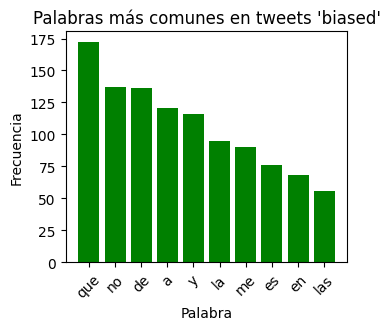

In [75]:
biased_df = pd.DataFrame(biased_freq.most_common(10), columns=['Palabra', 'Frecuencia'])
plt.figure(figsize=(8,3))
plt.subplot(1, 2, 1)
plt.bar(biased_df['Palabra'], biased_df['Frecuencia'], color='green')
plt.title("Palabras más comunes en tweets 'biased'")
plt.xticks(rotation=45)
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

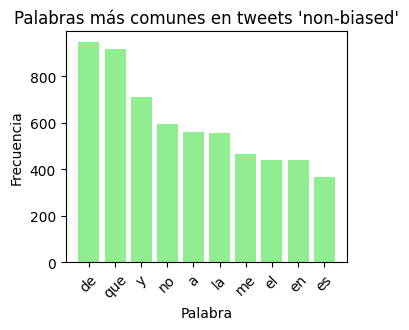

In [78]:
non_biased_df = pd.DataFrame(non_biased_freq.most_common(10), columns=['Palabra', 'Frecuencia'])
plt.figure(figsize=(8,3))
plt.subplot(1, 2, 2)
plt.bar(non_biased_df['Palabra'], non_biased_df['Frecuencia'], color='lightgreen')
plt.title("Palabras más comunes en tweets 'non-biased'")
plt.xticks(rotation=45)
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')

**Preguntas de Análisis de Frecuencia:**
- ¿Qué palabras son más comunes en los tweets 'biased' en comparación con los 'non-biased'?
- ¿Hay palabras que sugieran un sesgo en los tweets etiquetados como 'biased'?
- ¿Cómo podrían usar las empresas esta información para entender mejor las opiniones sesgadas?

**1. ¿Qué palabras son más comunes en los tweets 'biased' en comparación con los 'non-biased'?**

En los tweets ‘biased’ suelen repetirse palabras con carga emocional, adjetivos o términos polarizados, que reflejan una opinión o juicio.
En cambio, los tweets ‘non-biased’ usan lenguaje más descriptivo o neutral, con verbos y sustantivos informativos.

Esto sugiere que los mensajes con sesgo tienden a expresar opinión o valoración, mientras que los no sesgados se centran más en describir hechos o información objetiva.

**2. ¿Hay palabras que sugieran un sesgo en los tweets etiquetados como 'biased'?**

Sí. Las palabras que transmiten emoción, estereotipos o juicios de valor suelen marcar el sesgo.

Estas palabras indican que el tweet no solo comunica información, sino también una opinión o sentimiento dirigido hacia un grupo o tema.

**3. ¿Cómo podrían usar las empresas esta información para entender mejor las opiniones sesgadas?**

Las empresas pueden aprovechar este análisis para:

- Monitorear su reputación: identificar si las conversaciones sobre su marca contienen lenguaje con sesgo positivo o negativo.

- Mejorar la comunicación: adaptar sus mensajes publicitarios para evitar expresiones que puedan sonar discriminatorias o parciales.

- Detectar riesgos o crisis de imagen: un aumento de palabras con tono sesgado puede anticipar controversias o campañas de desinformación.

- Analizar a la competencia o a la audiencia: saber qué tipo de discurso usan sus clientes o rivales permite ajustar estrategias de marketing y relaciones públicas.

## 6. Visualización con Nube de Palabras
Usamos una nube de palabras para visualizar las palabras más comunes en cada conjunto de tweets.

In [ ]:
## Cree una funcion para geenrar nube de palabras

In [106]:
def generar_nube_palabras(texto):
    palabras =limpiar_texto(texto)
    nube = WordCloud(width=800, height=400, background_color='white').generate(palabras)
    plt.figure(figsize=(10, 5))
    plt.imshow(nube, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [102]:
non_biased=data[data["Label"]=="non-biased"]

In [103]:
texto=' '.join(non_biased['Contents'])

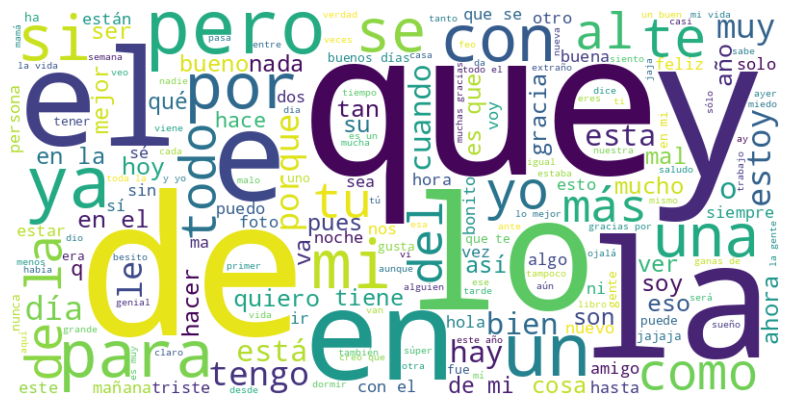

In [104]:
generar_nube_palabras(texto)

In [107]:
def generar_nube_palabras(texto):
    palabras =limpiar_texto(texto)
    nube = WordCloud(width=800, height=400, background_color='white').generate(palabras)
    plt.figure(figsize=(10, 5))
    plt.imshow(nube, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [108]:
biased=data[data["Label"]=="biased"]

In [109]:
texto=' '.join(biased['Contents'])

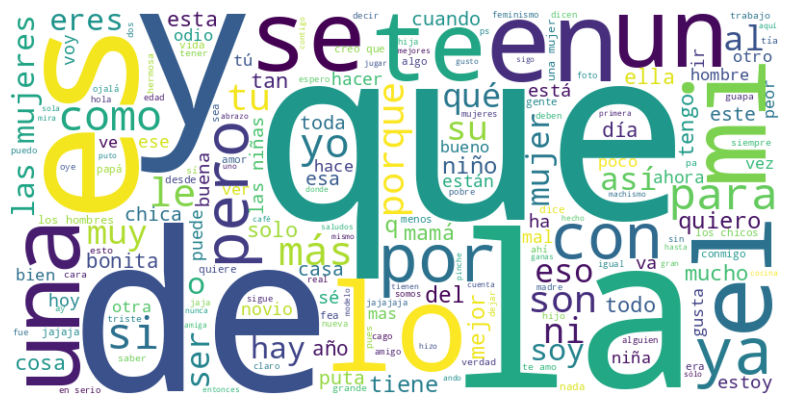

In [110]:
generar_nube_palabras(texto)

In [ ]:
# Generar nube de palabras para cada conjunto

In [ ]:
# NO biased nube de palabras

## 7. Conclusiones y Perspectiva de Negocios
En este taller, hemos explorado cómo el análisis de texto puede ofrecer información valiosa sobre el contenido y el sentimiento de los tweets. Reflexionemos sobre algunas preguntas de negocio:
- ¿Cómo podría utilizarse este análisis para mejorar la comunicación de la marca?
- ¿Qué ajustes se podrían hacer en una campaña de marketing si los tweets son predominantemente 'biased'?
- ¿Qué patrones importantes se podrían explorar en un análisis futuro (e.g., análisis de tendencias a lo largo del tiempo)?

**1. ¿Cómo podría utilizarse este análisis para mejorar la comunicación de la marca?**

El análisis de texto permite identificar cómo perciben los usuarios a la marca, el tono con el que se refieren a ella y qué temas generan más interacción o polarización.
Con esta información, la empresa puede:

- Ajustar su lenguaje comunicativo, utilizando un tono más empático y coherente con las emociones o preocupaciones del público.

- Detectar oportunidades de posicionamiento positivo, reforzando mensajes que despierten confianza o cercanía.

- Prevenir crisis de reputación, al identificar palabras o expresiones con carga negativa antes de que se amplifiquen en redes.

**2. ¿Qué ajustes se podrían hacer en una campaña de marketing si los tweets son predominantemente 'biased'?**

Si la mayoría de los tweets muestran sesgo, la marca debería:

- Revisar su mensaje publicitario, buscando neutralidad y evitando lenguaje que refuerce estereotipos o divisiones.

- Segmentar mejor a su audiencia, adaptando el contenido según el tipo de percepción o grupo que exprese el sesgo.

- Incorporar comunicación educativa o empática, que invite al diálogo y no a la confrontación.

- Monitorear el impacto posterior a los cambios, evaluando si el nivel de sesgo disminuye o si cambian las palabras más frecuentes.

Esto ayuda a construir una comunicación más inclusiva y sostenible, fortaleciendo la reputación de la marca en el largo plazo.

**3. ¿Qué patrones importantes se podrían explorar en un análisis futuro (por ejemplo, tendencias a lo largo del tiempo)?**

Para futuras investigaciones o proyectos empresariales, se podrían explorar:

- Evolución temporal del sesgo: cómo cambian los sentimientos o posturas de los usuarios a lo largo de semanas, meses o durante eventos específicos.

- Análisis de sentimiento y emociones: clasificar si los tweets son positivos, negativos o neutros, y detectar emociones como ira, alegría o tristeza.

- Palabras clave emergentes: identificar nuevas tendencias o temas que comienzan a ganar relevancia en las conversaciones.

- Comparación entre audiencias: observar cómo distintos grupos (edad, género, región) expresan sesgos o preferencias distintas.

Estos patrones permitirían desarrollar estrategias de marketing basadas en datos reales del público, anticipando comportamientos y ajustando el tono de la comunicación de manera proactiva.